In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(n_samples = 100, noise = 0.1, random_state = 1)

<Axes: xlabel='x1', ylabel='x2'>

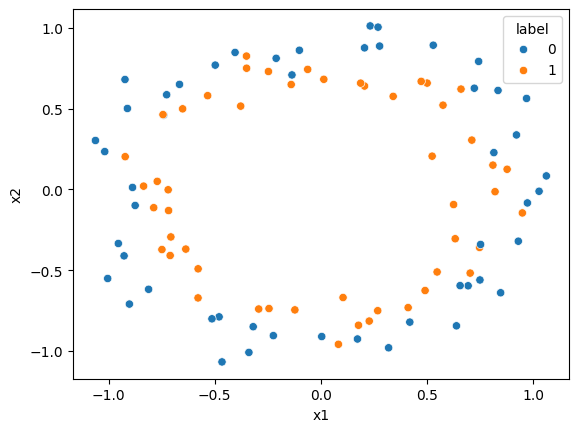

In [3]:
df = pd.DataFrame(X, columns=["x1", "x2"])
df['label'] = y

sns.scatterplot(data=df, x="x1", y="x2", hue="label")


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2)

In [5]:
model = Sequential()
model.add(Dense(256, input_shape = (2,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [7]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3500, verbose = 0)

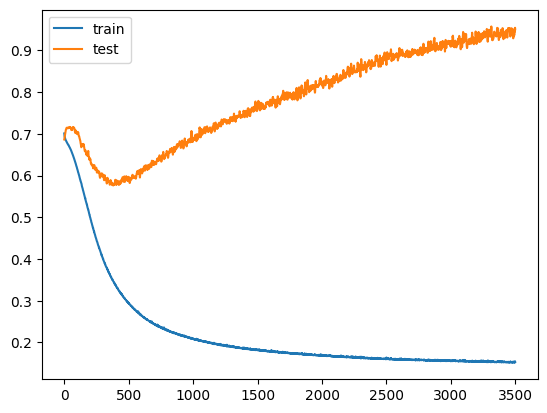

In [8]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


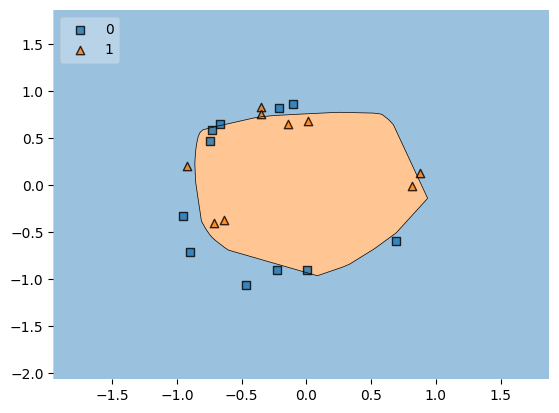

In [9]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)
plt.show()

# Early Stopping

In [10]:
model = Sequential()
model.add(Dense(256, input_shape = (2,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [12]:
callback = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 20,
    verbose = 1,
    mode = "auto",
    baseline = None,
    restore_best_weights = False
    )

In [13]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 3500, callbacks = callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - accuracy: 0.5188 - loss: 0.6962 - val_accuracy: 0.4000 - val_loss: 0.7058
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.5516 - loss: 0.6899 - val_accuracy: 0.4000 - val_loss: 0.7083
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.5211 - loss: 0.6926 - val_accuracy: 0.3500 - val_loss: 0.7087
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.5461 - loss: 0.6883 - val_accuracy: 0.3500 - val_loss: 0.7092
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5523 - loss: 0.6886 - val_accuracy: 0.4000 - val_loss: 0.7111
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5680 - loss: 0.6852 - val_accuracy: 0.4000 - val_loss: 0.7127
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.5797 - loss: 0.6842 - val_accuracy: 0.4500 - val_loss: 0.7140
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5031 - loss: 0.6904 - val_accuracy: 0.4500 - 

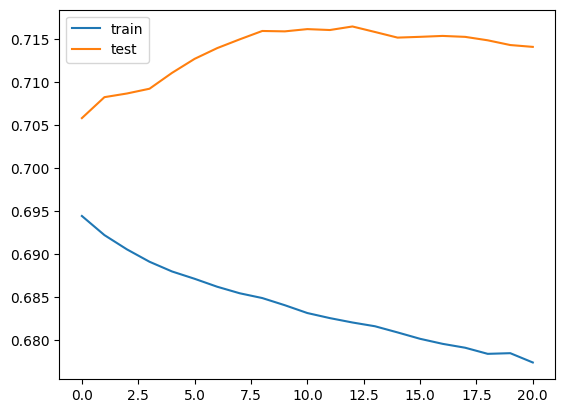

In [14]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


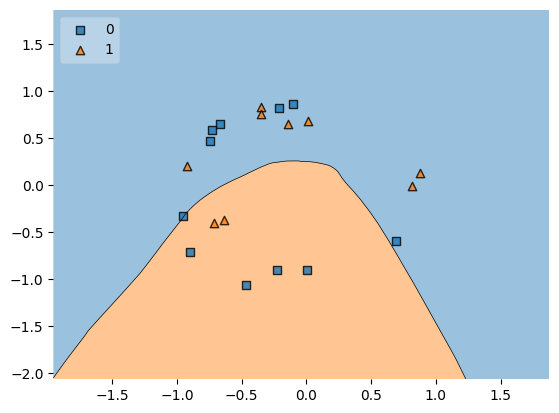

In [15]:
plot_decision_regions(X_test, y_test.ravel(), clf = model, legend = 2)
plt.show()